In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [2]:
## Importing data from csv files
athlete = pd.read_csv("athlete_events.csv" , on_bad_lines='skip')
region = pd.read_csv("noc_regions.csv")
athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41313,21308,Per Mikael Christiansson,M,23.0,186,70.0,Sweden,SWE,1984 Summer,1984.0,Summer,Los Angeles,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN
41314,21309,Stphane Christidis,M,23.0,192,81.0,France,FRA,2004 Summer,2004.0,Summer,Athina,Sailing,Sailing Mixed Skiff,NaN
41315,21309,Stphane Christidis,M,31.0,192,81.0,France,FRA,2012 Summer,2012.0,Summer,London,Sailing,Sailing Men's Skiff,NaN
41316,21310,Alan Thomas Christie,M,18.0,NaN,NaN,Canada,CAN,1924 Summer,1924.0,Summer,Paris,Athletics,Athletics Men's 400 metres,NaN


In [3]:
#Displaying the columns in the dataset
athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
#The first step is to check the null values in each individual column

print(athlete["ID"].isnull().value_counts())
print("There are no null values in the ID column")

False    41318
Name: ID, dtype: int64
There are no null values in the ID column


In [5]:
# Checking null values in the name column
print(athlete['Name'].isnull().value_counts())
print("There are no null values in the Name column")

False    41318
Name: Name, dtype: int64
There are no null values in the Name column


In [6]:
#Checking null values in the Sex column

print(athlete['Sex'].isnull().value_counts(),"\n") 
print("Data in the column \n",athlete['Sex'].value_counts())

False    41318
Name: Sex, dtype: int64 

Data in the column 
 M    30706
F    10612
Name: Sex, dtype: int64


In [7]:
athlete['Sex'].value_counts()

M    30706
F    10612
Name: Sex, dtype: int64

In [8]:
#Checking null values in the Age colum
#athlete['Age'] = pd.to_numeric(athlete['Age'], errors='coerce')
print("Checking for null values \n",athlete['Age'].isnull().value_counts(),"\n") #There are 9474 null values
print("Finding invalid age\n", athlete["Age"][(athlete['Age']>100) | (athlete['Age']<0)])

Checking for null values 
 False    39816
True      1502
Name: Age, dtype: int64 

Finding invalid age
 Series([], Name: Age, dtype: float64)


In [9]:
#Replacing null values with median
mean_val = athlete['Age'].median()
athlete['Age'].fillna(value=mean_val, inplace=True)

print(athlete['Age'].isnull().value_counts(),"\n") 

False    41318
Name: Age, dtype: int64 



In [10]:
#Checking null values in the Height column
print(athlete['Height'].isnull().value_counts(),"\n") 

False    31987
True      9331
Name: Height, dtype: int64 



In [11]:
#Replacing null values with median
athlete['Height'] = pd.to_numeric(athlete['Height'], errors='coerce')
mean_val = athlete['Height'].median()
athlete['Height'].fillna(value=mean_val, inplace=True)
print(athlete['Height'].isnull().value_counts(),"\n") 

False    41318
Name: Height, dtype: int64 



In [12]:
#Checking null values in the weight column
athlete['Weight'] = pd.to_numeric(athlete['Weight'], errors='coerce')
print(athlete['Weight'].isnull().value_counts(),"\n") #There are 62875 null values
print("Chcking for invalid data \n",athlete["Weight"][athlete["Weight"]<=0])

False    31515
True      9803
Name: Weight, dtype: int64 

Chcking for invalid data 
 Series([], Name: Weight, dtype: float64)


In [13]:
#Replacing null values with median
med_val = athlete['Weight'].median()
athlete['Weight'].fillna(value=med_val, inplace=True)
print(athlete['Weight'].isnull().value_counts(),"\n") 

False    41318
Name: Weight, dtype: int64 



In [14]:
#Checking null values in the Team column
print(athlete['Team'].isnull().value_counts(),"\n") 
print("Data \n",athlete['Team'].value_counts())

False    41317
True         1
Name: Team, dtype: int64 

Data 
 United States                  2654
France                         2485
Italy                          2353
Great Britain                  1826
Canada                         1459
                               ... 
Socit Nautique de Bayonne-1       1
Anitra                            1
White Lady                        1
Web III                           1
KNS                               1
Name: Team, Length: 629, dtype: int64


In [15]:
#Checking null values in the NOC column
print(athlete['NOC'].isnull().value_counts(),"\n") 


False    41317
True         1
Name: NOC, dtype: int64 



In [16]:
#Checking null values in the games column
print(athlete['Games'].isnull().value_counts(),"\n") 

False    41317
True         1
Name: Games, dtype: int64 



In [17]:
#Checking null values for season column
print(athlete['Season'].isnull().value_counts(),"\n") 

False    41317
True         1
Name: Season, dtype: int64 



In [18]:
#Checking null values for city column 
print(athlete['City'].isnull().value_counts(),"\n") 

False    41317
True         1
Name: City, dtype: int64 



In [19]:
#Checking null values in Sport 
print(athlete['Sport'].isnull().value_counts(),"\n") #There are no null values


False    41317
True         1
Name: Sport, dtype: int64 



In [20]:
# Checking null values Event 
print("Checking for null values \n",athlete['Event'].isnull().value_counts(),"\n") 


Checking for null values 
 False    41317
True         1
Name: Event, dtype: int64 



In [21]:
#The null values in Medal column are not actually null. They indicate that there has been no medal acheivement.
print("Checking for null values \n",athlete['Medal'].isnull().value_counts(),"\n") #There are 231333 entries without the medal 
print("Insights on the column \n",athlete['Medal'].describe(),"\n")
print("Data \n",athlete['Medal'].value_counts())

Checking for null values 
 True     35720
False     5598
Name: Medal, dtype: int64 

Insights on the column 
 count     5598
unique       3
top       Gold
freq      1908
Name: Medal, dtype: object 

Data 
 Gold      1908
Silver    1876
Bronze    1814
Name: Medal, dtype: int64


In [22]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
#Merge both the dataframes
athlete_merged = athlete.merge(region, how = 'left', on = 'NOC')
athlete_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [24]:
athlete_merged.shape

(41318, 17)

In [25]:
athlete_merged.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace= True)

In [26]:
athlete_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41318 entries, 0 to 41317
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      41318 non-null  int64  
 1   Name    41318 non-null  object 
 2   Sex     41318 non-null  object 
 3   Age     41318 non-null  float64
 4   Height  41318 non-null  float64
 5   Weight  41318 non-null  float64
 6   Team    41317 non-null  object 
 7   NOC     41317 non-null  object 
 8   Games   41317 non-null  object 
 9   Year    41317 non-null  float64
 10  Season  41317 non-null  object 
 11  City    41317 non-null  object 
 12  Sport   41317 non-null  object 
 13  Event   41317 non-null  object 
 14  Medal   5598 non-null   object 
 15  Region  41273 non-null  object 
 16  Notes   772 non-null    object 
dtypes: float64(4), int64(1), object(12)
memory usage: 5.7+ MB


In [27]:
athlete_merged.describe()
print(type(athlete_merged))

<class 'pandas.core.frame.DataFrame'>


In [28]:
athlete_merged.isnull().sum()
#There are no columns with null values except the medal column 

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          1
NOC           1
Games         1
Year          1
Season        1
City          1
Sport         1
Event         1
Medal     35720
Region       45
Notes     40546
dtype: int64

In [29]:
# Athlete details for the country India

athlete_merged.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,24.0,175.0,70.0,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,24.0,175.0,70.0,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984.0,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984.0,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988.0,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [30]:
# Top participating countries in Olympics
top_10_countries = athlete_merged.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    2654
France           2485
Italy            2353
Great Britain    1826
Canada           1459
Sweden           1347
Australia        1254
Germany          1198
Spain            1059
Switzerland       970
Name: Team, dtype: int64

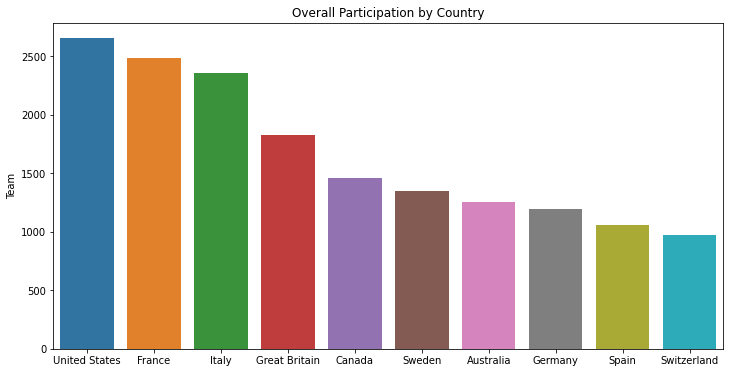

In [31]:
#Plot for the top 10 countries

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries);

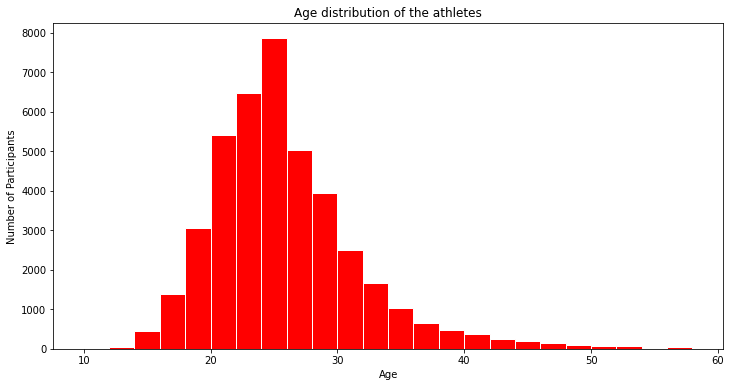

In [32]:
#Participations according to the age
plt.figure(figsize=(12,6))
plt.title("Age distribution of the athletes")
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athlete_merged.Age, bins = np.arange(10,60,2), color='red', edgecolor = 'white');

In [33]:
winter_games = athlete_merged[athlete_merged.Season == 'Winter'].Sport.unique()
winter_games

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [34]:
summer_games = athlete_merged[athlete_merged.Season == 'Summer'].Sport.unique()
summer_games

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque'], dtype=object)

In [35]:
#Participations according to the Gender
gender_count = athlete_merged["Sex"].value_counts()
gender_count.to_frame()

,Sex
M,30706
F,10612


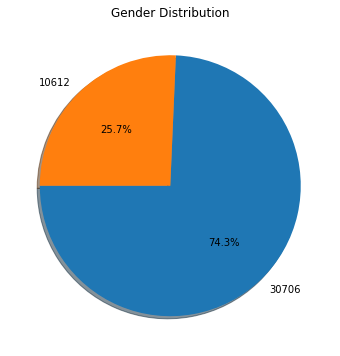

In [36]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_count, labels= gender_count, autopct = "%1.1f%%", startangle=180, shadow= True);

In [37]:
#Different medals count values
athlete_merged.Medal.value_counts()

Gold      1908
Silver    1876
Bronze    1814
Name: Medal, dtype: int64

In [38]:
#Female Participations is Summer olympics
female_participants = athlete_merged[(athlete_merged.Sex=='F')& (athlete_merged.Season=='Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants

,Year,Sex
0,1900.0,3
1,1908.0,8
2,1912.0,24
3,1920.0,29
4,1924.0,48
5,1928.0,51
6,1932.0,44
7,1936.0,74
8,1948.0,95
9,1952.0,178


In [39]:
summerWomenOlympics = athlete_merged[(athlete_merged.Sex == 'F') & (athlete_merged.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

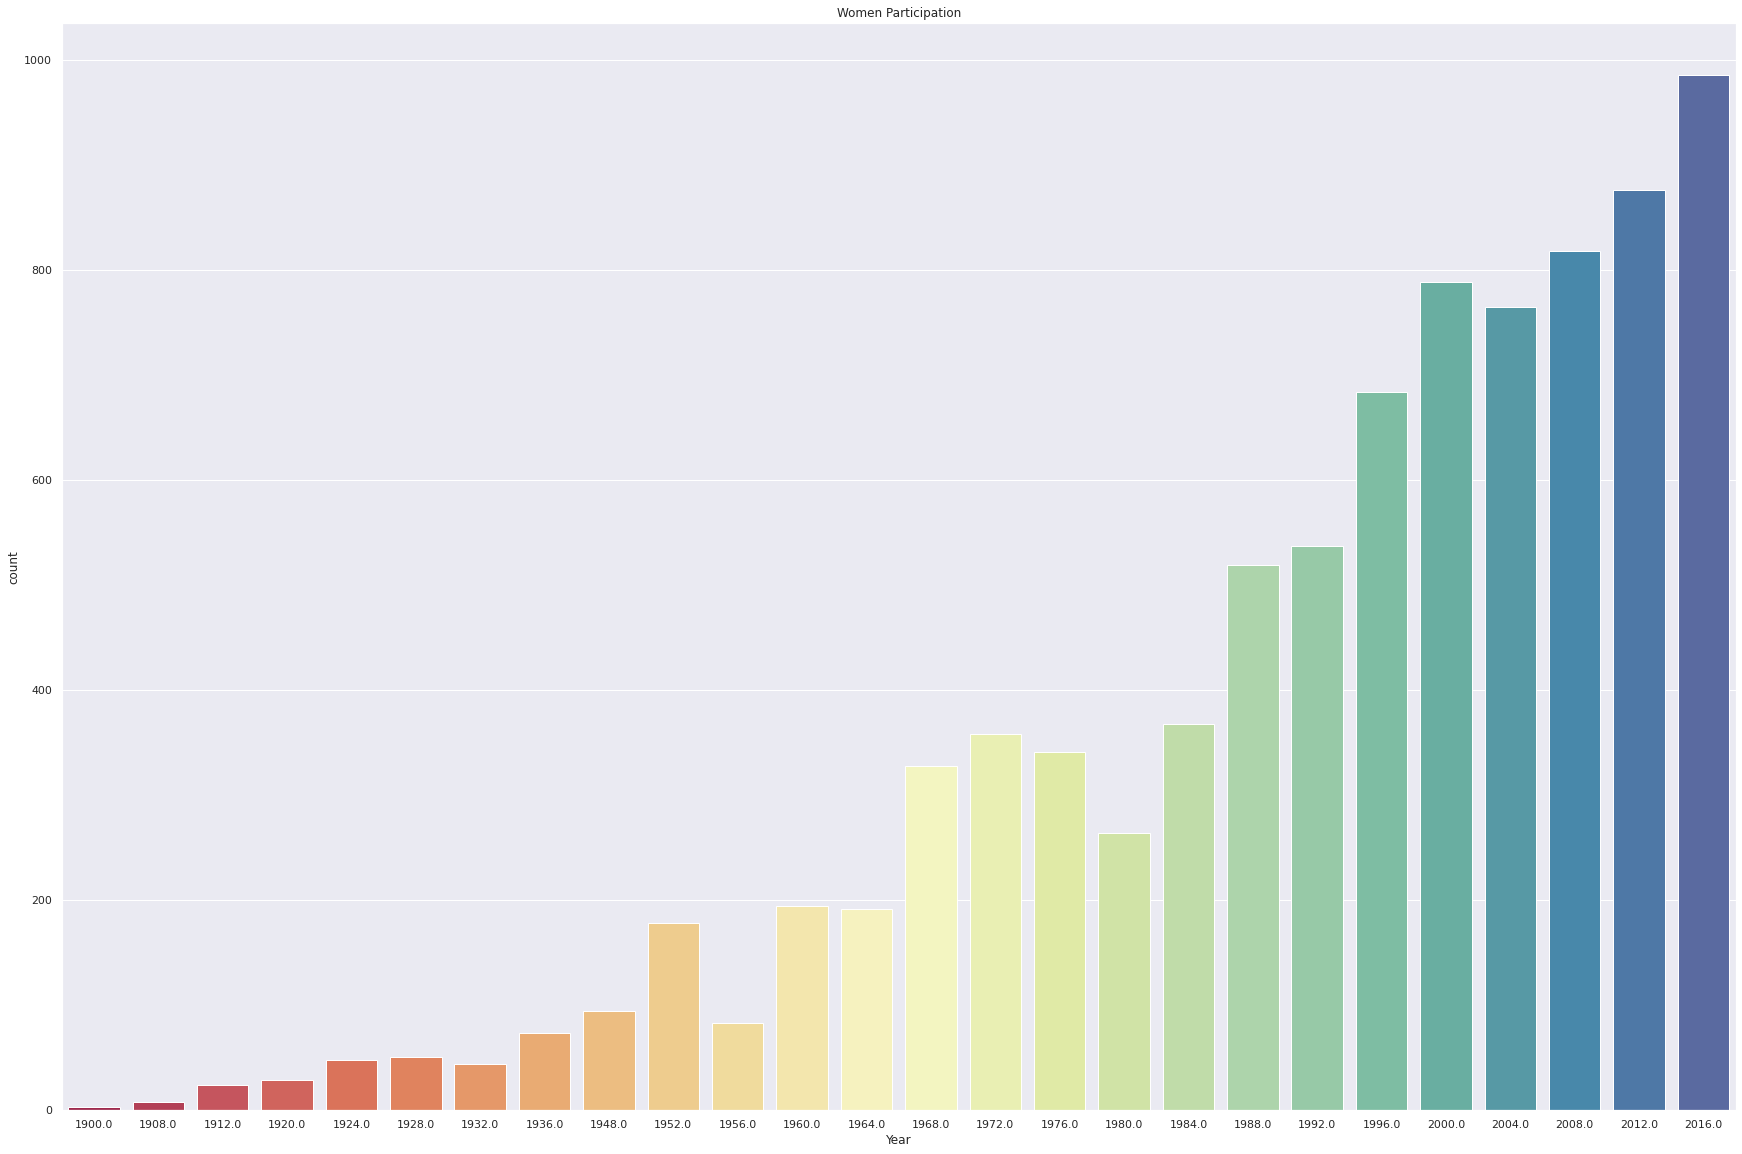

In [40]:
#Women Participations in summer olympics
sns.set(style="darkgrid")
plt.figure(figsize=(30,20))
sns.countplot(x='Year', data=summerWomenOlympics, palette="Spectral")
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

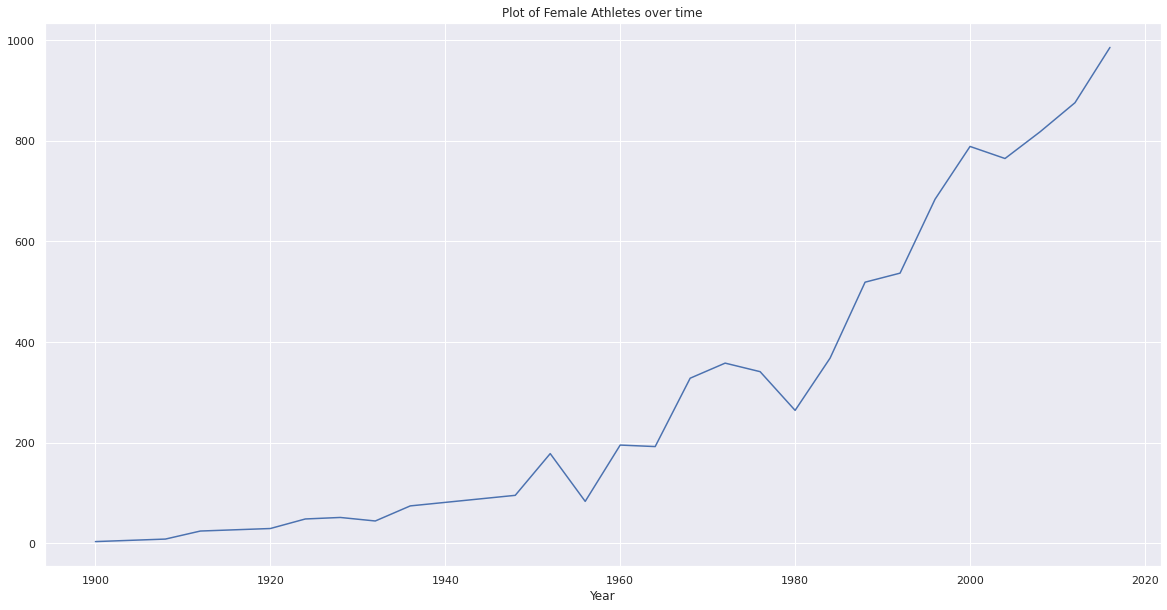

In [41]:
part = summerWomenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

In [42]:
summerMenOlympics = athlete_merged[(athlete_merged.Sex == 'M') & (athlete_merged.Season == 'Summer')]

Text(0.5, 1.0, 'Men Participation')

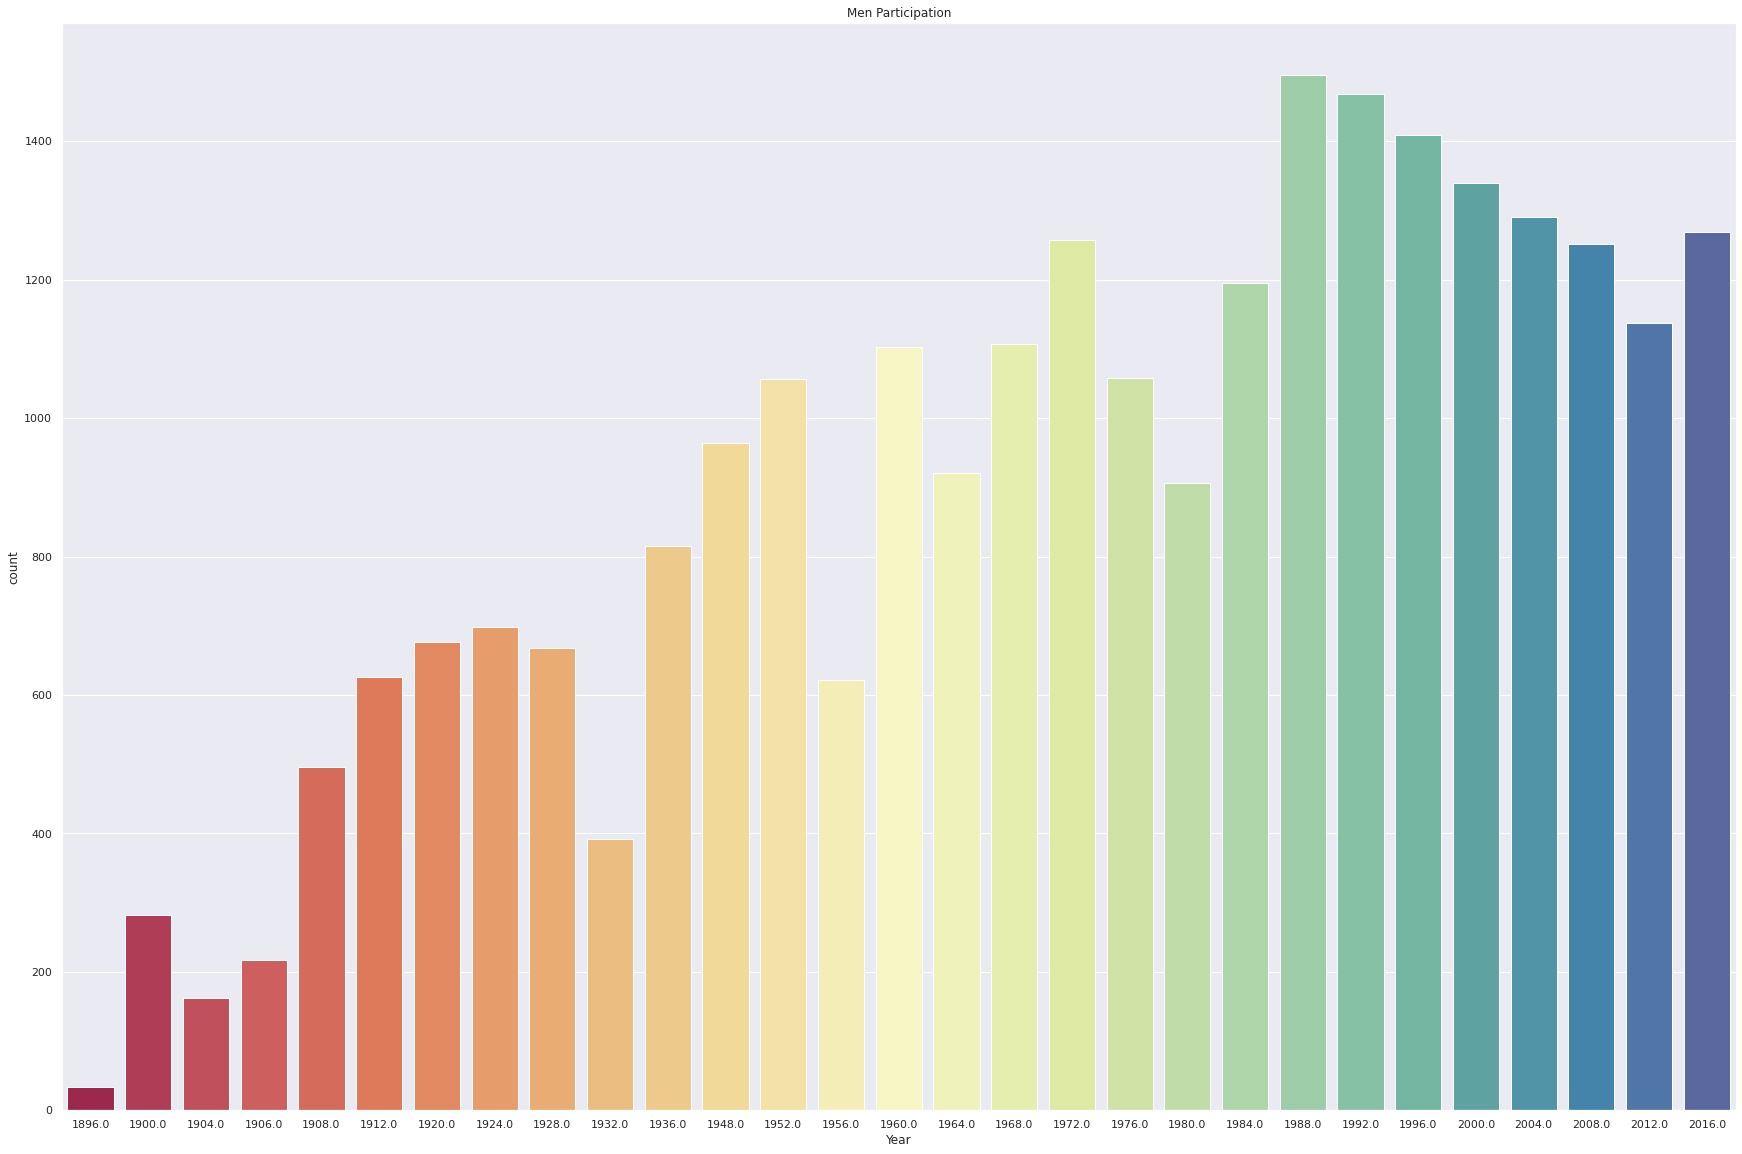

In [43]:
#Men Participations in summer olympics
sns.set(style="darkgrid")
plt.figure(figsize=(30,20))
sns.countplot(x='Year', data=summerMenOlympics, palette="Spectral")
plt.title('Men Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

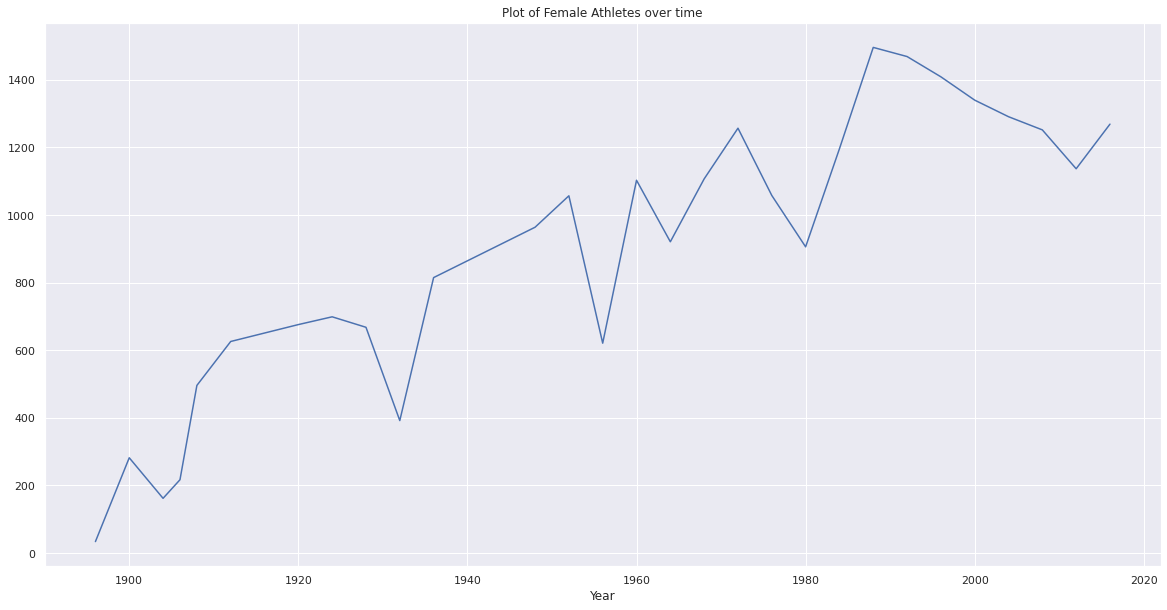

In [44]:
part = summerMenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'M'].plot()
plt.title('Plot of Female Athletes over time')

In [45]:
goldMedals = athlete_merged[(athlete_merged.Medal == 'Gold')]
goldMedals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992.0,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,21275,"David William ""Dave"" Christian",M,20.0,180.0,77.0,United States,USA,1980 Winter,1980.0,Winter,Lake Placid,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold,USA,NaN
41257,21277,Frederick William Christian,M,32.0,175.0,70.0,Devon and Somerset Wanderers,GBR,1900 Summer,1900.0,Summer,Paris,Cricket,Cricket Men's Cricket,Gold,UK,NaN
41259,21279,"Roger Allen ""Rog"" Christian",M,24.0,175.0,68.0,United States,USA,1960 Winter,1960.0,Winter,Squaw Valley,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold,USA,NaN
41288,21296,Lauritz Christian Christiansen,M,52.0,175.0,70.0,Atlanta,NOR,1920 Summer,1920.0,Summer,Antwerpen,Sailing,Sailing Mixed 12 metres,Gold,Norway,NaN


Text(0.5, 1.0, 'Gold Medals per Country')

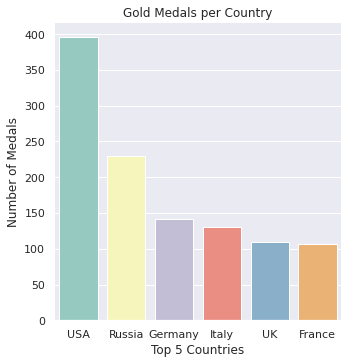

In [46]:
#Top 5 Countries with highest gold medals
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
plot = sns.catplot(x="index", y = "Medal", data = totalGoldMedals, height =5, kind='bar', palette="Set3")
plot.despine(left = True)
plot.set_xlabels("Top 5 Countries")
plot.set_ylabels("Number of Medals")
plt.title('Gold Medals per Country')

In [47]:
athlete_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
